In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Generate Random Graph

rand_graph = nx.fast_gnp_random_graph(15, 0.20, directed=True)

for (u, v) in rand_graph.edges():
    rand_graph.edges[u, v]['weight'] = random.uniform(0, 1)

In [3]:
rand_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

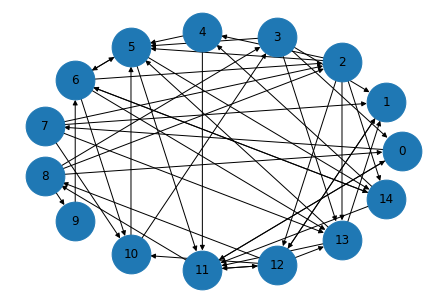

In [4]:
def draw_compat(g):
    plt.figure()
    pos = nx.circular_layout(g, scale = 1)
    nx.draw(g, pos, node_size=1500)
    nx.draw_networkx_labels(g, pos)
    plt.savefig("graph.png", dpi=100)
    
draw_compat(rand_graph)

In [5]:
cycles = list(nx.simple_cycles(rand_graph))

# for c in cycles:
#     print(c)


In [6]:
len(cycles)

1767

In [11]:
def reduce_cycles(graph, maxk = 4):
    G = nx.DiGraph()
    cycles = list(nx.simple_cycles(rand_graph))
    
    for i, c in enumerate(cycles):
        if len(c) <= maxk:
            G.add_node(i)
            print(c)
            
            # Sum up the weights of each edge in the cycle
            cycle_weight = 0
            for j in range(len(c) - 1):
                cycle_weight += graph[c[j]][c[j+1]]["weight"]
            cycle_weight += graph[c[len(c) - 1]][c[0]]["weight"]
            
            G.nodes[i]['weight'] = round(cycle_weight, 2)
            G.nodes[i]['members'] = c.copy()
    for u in G.nodes:
        for v in G.nodes:
            if u is not v and set(cycles[u]) & set(cycles[v]):
                G.add_edge(u, v)
    return G


In [12]:
c_graph = reduce_cycles(rand_graph)
print(len(c_graph))


[0, 11, 12, 8]
[0, 11, 8, 3]
[0, 11, 8]
[0, 11]
[0, 7, 13, 11]
[0, 7, 10, 3]
[1, 12, 13]
[1, 12, 10, 3]
[1, 12, 8, 3]
[1, 12]
[2, 14, 11, 8]
[2, 14, 6]
[2, 13, 11, 8]
[2, 13, 5, 6]
[2, 12, 11, 8]
[2, 12, 8]
[2, 5, 14, 6]
[2, 5, 11, 8]
[2, 5, 6]
[2, 4, 11, 8]
[2, 4, 5, 6]
[3, 13, 11, 8]
[3, 5, 11, 8]
[3, 5, 6, 10]
[4, 5, 14]
[4, 5, 6, 14]
[5, 14, 6, 13]
[5, 14, 6, 10]
[5, 14, 6]
[5, 11, 12, 13]
[5, 11, 12, 10]
[5, 6, 13]
[5, 6, 10]
[5, 6]
[6, 14]
[11, 12, 13]
[11, 12]
37


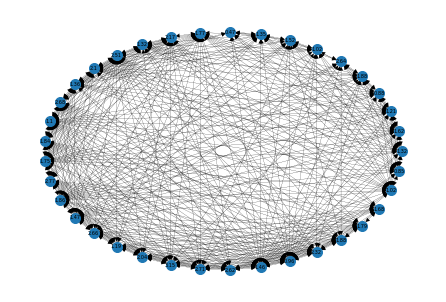

In [17]:
def draw_reduced(g):
    plt.figure()
    cpos = nx.circular_layout(g)
    nx.draw(g, cpos, node_size=100, width = 0.1)
    node_lables = nx.get_node_attributes(g, "weight")
    nx.draw_networkx_labels(g, cpos, node_lables, font_size=5)
    plt.savefig("graph.png", dpi=1000)
    
#draw_reduced(c_graph)